<a href="https://colab.research.google.com/github/dilul/D3-world-map-ICA/blob/main/Project-Fakeedit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Simple Way to Read TSV Files in Python using pandas
img_txt_data_df = pd.read_csv('/content/gdrive/My Drive/Nalinika/multimodal_train.tsv', sep='\t')

# printing data
img_txt_data_df.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2


In [ ]:
img_txt_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564000 entries, 0 to 563999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   author                535290 non-null  object 
 1   clean_title           564000 non-null  object 
 2   created_utc           564000 non-null  float64
 3   domain                396143 non-null  object 
 4   hasImage              564000 non-null  bool   
 5   id                    564000 non-null  object 
 6   image_url             562466 non-null  object 
 7   linked_submission_id  167857 non-null  object 
 8   num_comments          396143 non-null  float64
 9   score                 564000 non-null  int64  
 10  subreddit             564000 non-null  object 
 11  title                 564000 non-null  object 
 12  upvote_ratio          396143 non-null  float64
 13  2_way_label           564000 non-null  int64  
 14  3_way_label           564000 non-null  int64  
 15  

In [ ]:
img_txt_data_df.shape

(564000, 16)

In [ ]:
import os
import csv

def get_files_in_directory(directory):
    """Get a list of files in the given directory."""
    files = []
    for root, _, filenames in os.walk(directory):
        for filename in filenames:
            files.append((root, filename))
    return files

def write_files_to_csv(files, csv_filename):
    """Write the list of files to a CSV file."""
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['File Location', 'File Name'])  # Write header
        for file_location, file_name in files:
            writer.writerow([file_location, file_name])

if __name__ == "__main__":
    directory = "/content/gdrive/My Drive/Nalinika/train_images2/"
    csv_filename = 'imagMapping.csv'

    files = get_files_in_directory(directory)
    write_files_to_csv(files, csv_filename)

    print(f"File names and locations have been written to {csv_filename}.")


File names and locations have been written to imagMapping.csv.


In [ ]:
#Load the image paths file
image_paths_df = pd.read_csv('/content/gdrive/My Drive/Nalinika/imagMapping.csv')
image_paths_df['File Name'] = image_paths_df['File Name'].str.replace('.jpg',"", regex=False)
image_paths_df.rename(columns={"File Location": "Image_Path", "File Name": "id"}, inplace=True)
image_paths_df

,Image_Path,id
0,/content/gdrive/My Drive/Nalinika/train_images...,1fa3x4
1,/content/gdrive/My Drive/Nalinika/train_images...,xitzr
2,/content/gdrive/My Drive/Nalinika/train_images...,1as43r
3,/content/gdrive/My Drive/Nalinika/train_images...,1b42lr
4,/content/gdrive/My Drive/Nalinika/train_images...,yzqkd
...,...,...
167684,/content/gdrive/My Drive/Nalinika/train_images...,433vdc
167685,/content/gdrive/My Drive/Nalinika/train_images...,49jtxf
167686,/content/gdrive/My Drive/Nalinika/train_images...,44kr9e
167687,/content/gdrive/My Drive/Nalinika/train_images...,45wbkz


In [ ]:
display(image_paths_df.drop_duplicates())

,Image_Path,id
0,/content/gdrive/My Drive/Nalinika/train_images...,1fa3x4
1,/content/gdrive/My Drive/Nalinika/train_images...,xitzr
2,/content/gdrive/My Drive/Nalinika/train_images...,1as43r
3,/content/gdrive/My Drive/Nalinika/train_images...,1b42lr
4,/content/gdrive/My Drive/Nalinika/train_images...,yzqkd
...,...,...
167684,/content/gdrive/My Drive/Nalinika/train_images...,433vdc
167685,/content/gdrive/My Drive/Nalinika/train_images...,49jtxf
167686,/content/gdrive/My Drive/Nalinika/train_images...,44kr9e
167687,/content/gdrive/My Drive/Nalinika/train_images...,45wbkz


In [ ]:
img_txt_data_df.drop_duplicates(subset="id",
                     keep=False, inplace=True)

In [ ]:
# Merge the datasets on a common identifier (e.g., 'id')
merged_text_img_data = pd.merge(img_txt_data_df, image_paths_df,on="id")
merged_text_img_data.head()

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,Image_Path
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
1,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
2,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2,/content/gdrive/My Drive/Nalinika/train_images...
3,happenpupe,major thermos,1.495660e+09,i.redd.it,True,6d50rl,https://preview.redd.it/l9gvkkf3jizy.jpg?width...,NaN,0.0,2,pareidolia,major thermos,0.67,0,2,2,/content/gdrive/My Drive/Nalinika/train_images...
4,all-top-today_SS,cutest baby cow ive seen in my head all day an...,1.509141e+09,i.redd.it,True,796d3z,https://preview.redd.it/mbj3et90gbuz.jpg?width...,NaN,21.0,141,subredditsimulator,Cutest baby cow I've seen in my head all day a...,0.99,0,2,3,/content/gdrive/My Drive/Nalinika/train_images...


In [ ]:
merged_text_img_data['Image_Path'][2]

'/content/gdrive/My Drive/Nalinika/train_images2/folder_30'

**Data Preprocessing**

In [ ]:
merged_text_img_data.drop(['author', 'created_utc'], axis=1, inplace=True)
merged_text_img_data

,clean_title,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,Image_Path
0,my walgreens offbrand mucinex was engraved wit...,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
1,puppy taking in the view,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
2,i found a face in my sheet music too,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2,/content/gdrive/My Drive/Nalinika/train_images...
3,major thermos,i.redd.it,True,6d50rl,https://preview.redd.it/l9gvkkf3jizy.jpg?width...,NaN,0.0,2,pareidolia,major thermos,0.67,0,2,2,/content/gdrive/My Drive/Nalinika/train_images...
4,cutest baby cow ive seen in my head all day an...,i.redd.it,True,796d3z,https://preview.redd.it/mbj3et90gbuz.jpg?width...,NaN,21.0,141,subredditsimulator,Cutest baby cow I've seen in my head all day a...,0.99,0,2,3,/content/gdrive/My Drive/Nalinika/train_images...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122215,police are puppets poster circa,i.redd.it,True,7qupae,https://preview.redd.it/ax28c98ebha01.jpg?widt...,NaN,0.0,93,propagandaposters,"""Police Are Puppets"" poster, circa 2012",0.94,0,1,5,/content/gdrive/My Drive/Nalinika/train_images...
122216,sheriffs department saves christmas for a litt...,m.theherald-news.com,True,3yslp5,https://external-preview.redd.it/lJCwKelbhQdPl...,NaN,1.0,18,upliftingnews,Sheriff's Department Saves Christmas for a Lit...,0.85,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
122217,her hips look very flexible,i.redd.it,True,d427bp,https://preview.redd.it/zxr6lq1ejim31.jpg?widt...,NaN,4.0,31,confusing_perspective,Her hips look very flexible,0.79,0,2,2,/content/gdrive/My Drive/Nalinika/train_images...
122218,silly walks,NaN,True,cbzo5cm,http://i.imgur.com/2b6xvHt.jpg,1lil54,NaN,381,psbattle_artwork,Silly Walks,NaN,0,2,4,/content/gdrive/My Drive/Nalinika/train_images...


In [ ]:
#Get the target names in the dataset
class_names = merged_text_img_data['2_way_label'].unique()
print(class_names)

[1 0]


In [ ]:
target = merged_text_img_data['2_way_label'].value_counts()
print(target)

2_way_label
0    74182
1    48038
Name: count, dtype: int64


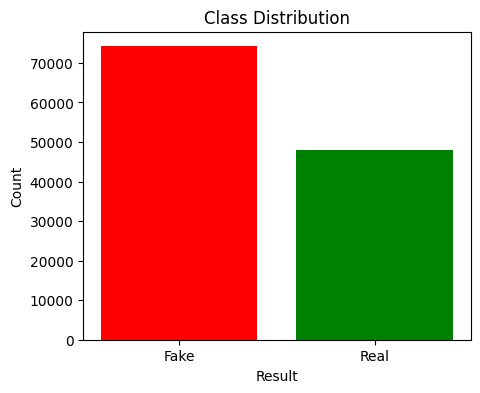

In [ ]:
# Count the number of instances in each class
class_counts = merged_text_img_data['2_way_label'].value_counts()

# Plot the class distribution
beingsaved = plt.figure(figsize=(5, 4))
colors = ['red', 'green']
plt.bar(['Fake', 'Real'], class_counts.values, color=colors)
plt.xlabel('Result')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [ ]:
merged_text_img_data.isna().sum()

clean_title                 0
domain                  36465
hasImage                    0
id                          0
image_url                 296
linked_submission_id    85755
num_comments            36465
score                       0
subreddit                   0
title                       0
upvote_ratio            36465
2_way_label                 0
3_way_label                 0
6_way_label                 0
Image_Path                  0
dtype: int64

**Preprocess Data**

In [ ]:
!pip install transformers==4.37.2

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

In [ ]:
sub_text_img = merged_text_img_data.head(1000)
sub_text_img

,clean_title,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label,Image_Path
0,my walgreens offbrand mucinex was engraved wit...,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
1,puppy taking in the view,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
2,i found a face in my sheet music too,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2,/content/gdrive/My Drive/Nalinika/train_images...
3,major thermos,i.redd.it,True,6d50rl,https://preview.redd.it/l9gvkkf3jizy.jpg?width...,NaN,0.0,2,pareidolia,major thermos,0.67,0,2,2,/content/gdrive/My Drive/Nalinika/train_images...
4,cutest baby cow ive seen in my head all day an...,i.redd.it,True,796d3z,https://preview.redd.it/mbj3et90gbuz.jpg?width...,NaN,21.0,141,subredditsimulator,Cutest baby cow I've seen in my head all day a...,0.99,0,2,3,/content/gdrive/My Drive/Nalinika/train_images...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,i was looking at a torpedo when i saw this loo...,i.redd.it,True,d322dd,https://preview.redd.it/n6reqgso13m31.jpg?widt...,NaN,0.0,16,pareidolia,I was looking at a torpedo when I saw this loo...,0.86,0,2,2,/content/gdrive/My Drive/Nalinika/train_images...
996,report at least people hanged in syrian prison...,bigstory.ap.org,True,5si5d9,https://external-preview.redd.it/70Dz35XtGjKje...,NaN,1.0,23,neutralnews,"Report: At least 13,000 people hanged in Syria...",0.94,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
997,jimmy carter and an aide vaulting a fence,i.redd.it,True,6n9jy8,https://preview.redd.it/snys1mxhok9z.jpg?width...,NaN,3.0,4,photoshopbattles,PsBattle: Jimmy Carter and an aide vaulting a ...,0.75,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...
998,after initial tests in us facebook rolls out a...,techcrunch.com,True,7fwg79,https://external-preview.redd.it/l8IxMxlgl5gRo...,NaN,4.0,49,upliftingnews,"After initial tests in US, Facebook rolls out ...",0.85,1,0,0,/content/gdrive/My Drive/Nalinika/train_images...


In [ ]:
# # Preprocess text data
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# max_length = 128

# def preprocess_text(text):
#     tokens = tokenizer.encode_plus(text, max_length=max_length, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
#     return tokens['input_ids'], tokens['attention_mask']

# # sub_text_img['input_ids'], sub_text_img['attention_mask'] = zip(*sub_text_img['title'].apply(preprocess_text))
# sub_text_img.loc[:, ['input_ids', 'attention_mask']] = list(zip(*sub_text_img['title'].apply(preprocess_text)))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
# Preprocess text data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128

def preprocess_text(text):
    tokens = tokenizer.encode_plus(text, max_length=max_length, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    input_ids = tf.squeeze(tokens['input_ids'], axis=0)  # Remove the extra dimension
    attention_mask = tf.squeeze(tokens['attention_mask'], axis=0)  # Remove the extra dimension
    return input_ids, attention_mask

sub_text_img.loc[:, ['input_ids', 'attention_mask']] = list(zip(*sub_text_img['title'].apply(preprocess_text)))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
sub_text_img.loc[:, 'Image_Path'] = sub_text_img['Image_Path'] + os.sep + sub_text_img['id'] + ".jpg"
sub_text_img['Image_Path'][1]

'/content/gdrive/My Drive/Nalinika/train_images2/set 12/4xypkv.jpg'

In [ ]:
sub_text_img['Image_Path'][2]

'/content/gdrive/My Drive/Nalinika/train_images2/folder_30/8gnet9.jpg'

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define the image preprocessing function
def preprocess_image(image_path, target_size=(224, 224)):
  try:
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image = tf.keras.applications.resnet50.preprocess_input(image)
  except:
    print("text")
    print(image_path)

  else:
    return image


# Apply the preprocessing function to the image paths
sub_text_img.loc[:, 'image'] = sub_text_img['Image_Path'].apply(preprocess_image)


<ipython-input-77-d83456c35efb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_text_img.loc[:, 'image'] = sub_text_img['Image_Path'].apply(preprocess_image)


In [ ]:
output_file = '/content/gdrive/My Drive/Nalinika/preprocessed_data.tsv'

# Write the DataFrame to a TSV file
sub_text_img.to_csv(output_file, sep='\t', index=False)

print(f"DataFrame successfully written as {output_file} \n {sub_text_img}")

DataFrame successfully written as /content/gdrive/My Drive/Nalinika/preprocessed_data.tsv 
                                            clean_title              domain  \
0    my walgreens offbrand mucinex was engraved wit...         i.imgur.com   
1                             puppy taking in the view         i.imgur.com   
2                 i found a face in my sheet music too           i.redd.it   
3                                        major thermos           i.redd.it   
4    cutest baby cow ive seen in my head all day an...           i.redd.it   
..                                                 ...                 ...   
995  i was looking at a torpedo when i saw this loo...           i.redd.it   
996  report at least people hanged in syrian prison...     bigstory.ap.org   
997          jimmy carter and an aide vaulting a fence           i.redd.it   
998  after initial tests in us facebook rolls out a...      techcrunch.com   
999  she gave medicine to pets she rescued from hu

**Model Architecture**

In [ ]:
# Define model inputs
text_input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
text_attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')
image_input = tf.keras.layers.Input(shape=(224, 224, 3), name='image_input')

# BERT model for text feature extraction
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
text_features = bert_model(text_input_ids, attention_mask=text_attention_mask)[1]

# ResNet model for image feature extraction
resnet_model = ResNet50(include_top=False, pooling='avg', input_shape=(224, 224, 3))
image_features = resnet_model(image_input)

# Combine features
combined_features = tf.keras.layers.concatenate([text_features, image_features])
dense_layer = tf.keras.layers.Dense(256, activation='relu')(combined_features)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid')(dense_layer)

# Define the model
model = tf.keras.models.Model(inputs=[text_input_ids, text_attention_mask, image_input], outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a 

In [ ]:
import numpy as np
tf.test.gpu_device_name()


NameError: name 'tf' is not defined

In [ ]:
# Prepare the inputs and labels
input_ids = np.array(sub_text_img['input_ids'].tolist())
attention_mask = np.array(sub_text_img['attention_mask'].tolist())
images = np.array([image[0] for image in sub_text_img['image']])
labels = sub_text_img['2_way_label'].values

# Train the model
history = model.fit(
    [input_ids, attention_mask, images],
    labels,
    batch_size=32,
    epochs=3,
    validation_split=0.1
)


NameError: name 'sub_text_img' is not defined